## Plot the landscape under current conditions

In [7]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# open the file
resilience_df = pd.read_csv('resilience_landscape.csv').drop(['Unnamed: 0'], axis=1)

Text(0.5, 0, 'Stocking Change')

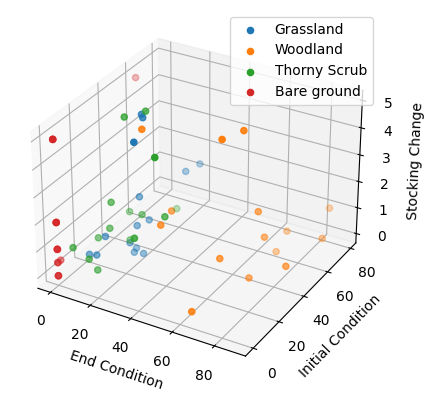

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s in resilience_df["Ecosystem Element"].unique():
    ax.scatter(resilience_df["End Condition"][resilience_df["Ecosystem Element"]==s],resilience_df["Initial Condition"][resilience_df["Ecosystem Element"]==s],resilience_df["Stocking Change"][resilience_df["Ecosystem Element"]==s],label=s)

ax.legend()
ax.set_xlabel('End Condition')
ax.set_ylabel('Initial Condition')
ax.set_zlabel('Stocking Change')


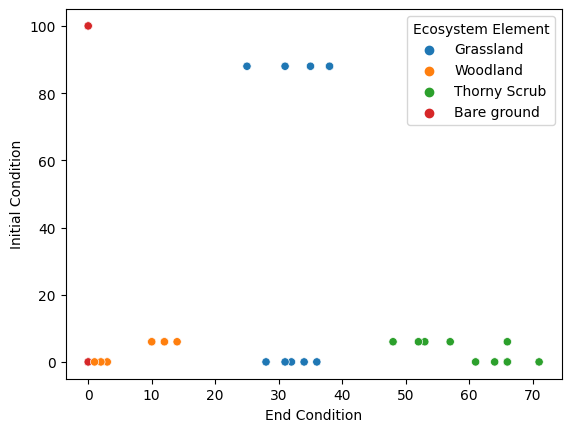

In [10]:
f = sns.scatterplot(data = resilience_df, x='End Condition', y='Initial Condition', hue = "Ecosystem Element")
plt.show()